<a href="https://colab.research.google.com/github/rgprado/SeriesTemporais/blob/main/Series_Temporais_aula1_202201_Rodrigo_Prado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Análise de Séries Temporais
 
 Professor: Domingos Santos

 Rodrigo Prado

 Atividade 1

 - selecionar 2 séries: uma financeira e uma adicional (sugestão, uma disponível no pydataset)
 - plot da média movél 
 - análise de quais componentes foram observados nas séries
 - Calcularem o ACF e PACF das séries
 - analisar a série "sem_nome", identificar os componentes e defina essa série 

In [1]:
!pip install yfinance pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=ea98bc99392c171365fafe83da85d5241df4acb35b327b684e55a1c0ac4539b3
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset
  

In [2]:
import yfinance as yf
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

initiated datasets repo at: /root/.pydataset/


In [3]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  return  df.history(period="max")

In [5]:
df_amazon = get_yfinance('AMZN')

In [6]:
df_amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,87.570000,90.190002,87.290001,89.870003,67756600,0.0,0.0
2023-01-11 00:00:00-05:00,90.930000,95.260002,90.930000,95.089996,103126200,0.0,0.0
2023-01-12 00:00:00-05:00,96.930000,97.190002,93.500000,95.269997,85254800,0.0,0.0


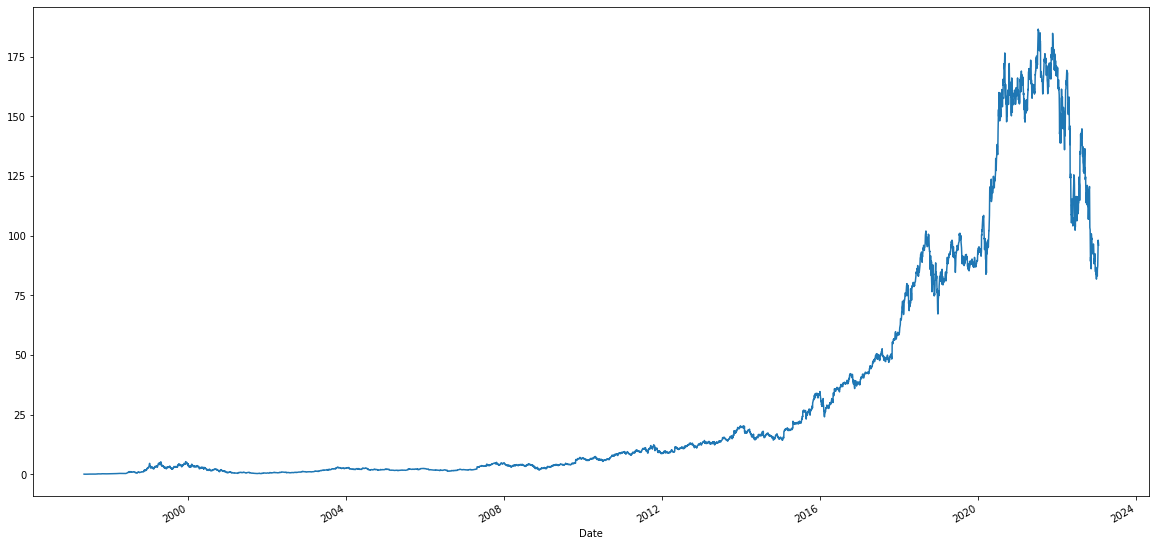

In [7]:
df_amazon['Close'].plot()

In [8]:
timeseries_titles = ['AirPassengers', 'nottem', 'ambientNOxCH', 'acme', 'sunspot.year', 'UKDriverDeaths', 
                    'USAccDeaths', 'UKgas', 'JohnsonJohnson', 'Nile', 'LakeHuron', 'austres', 
                    'lynx', 'deaths', 'drivers']
                    
df_jj = data('JohnsonJohnson')

In [9]:
len(timeseries_titles)

15

In [10]:
data('JohnsonJohnson', show_doc=True )

JohnsonJohnson

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Quarterly Earnings per Johnson & Johnson Share

### Description

Quarterly earnings (dollars) per Johnson & Johnson share 1960–80.

### Usage

    JohnsonJohnson

### Format

A quarterly time series

### Source

Shumway, R. H. and Stoffer, D. S. (2000) _Time Series Analysis and its
Applications_. Second Edition. Springer. Example 1.1.

### Examples

    require(stats); require(graphics)
    JJ <- log10(JohnsonJohnson)
    plot(JJ)
    ## This example gives a possible-non-convergence warning on some
    ## platforms, but does seem to converge on x86 Linux and Windows.
    (fit <- StructTS(JJ, type = "BSM"))
    tsdiag(fit)
    sm <- tsSmooth(fit)
    plot(cbind(JJ, sm[, 1], sm[, 3]-0.5), plot.type = "single",
         col = c("black", "green", "blue"))
    abline(h = -0.5, col = "grey60")
    monthplot(fit)




In [11]:
df_jj['date'] = pd.date_range(start = '1960-01-01', end='1981-01-01', freq='Q' )

In [12]:
df_jj.set_index('date', inplace=True)

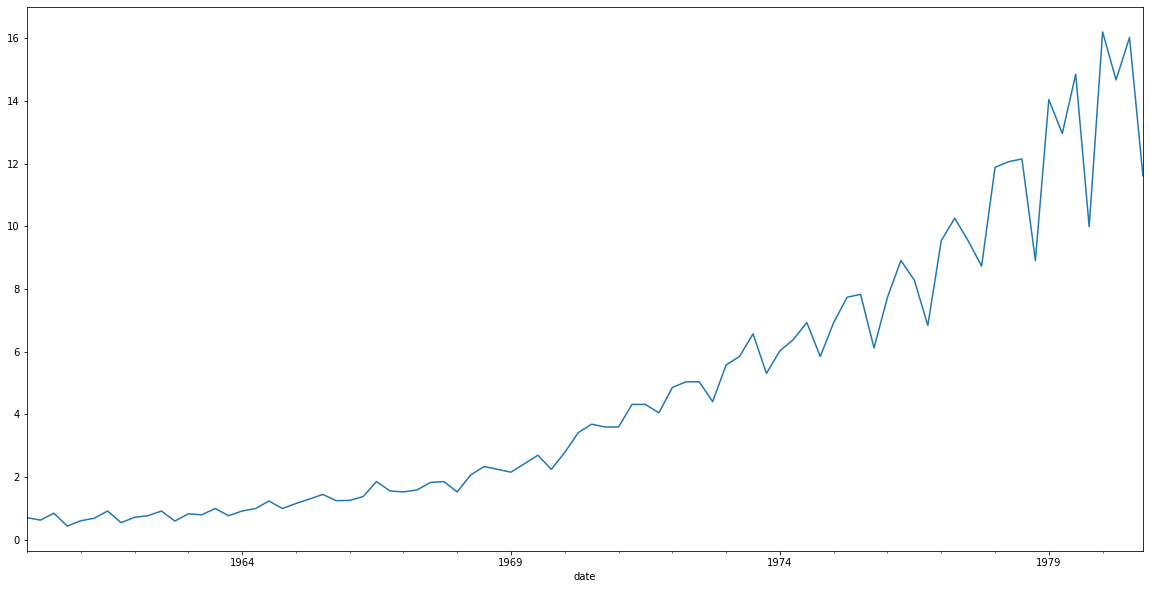

In [13]:
df_jj['JohnsonJohnson'].plot()

In [14]:
example_ma = [1,2,3,4,5,6,7,8,9,10]
ma_size=2

for i in range(ma_size, len(example_ma)):
  consider_val = example_ma[i-ma_size:i]
  print(f'valores considerados: {consider_val}, MA {np.mean(consider_val)}, valor atual {i}')

valores considerados: [1, 2], MA 1.5, valor atual 2
valores considerados: [2, 3], MA 2.5, valor atual 3
valores considerados: [3, 4], MA 3.5, valor atual 4
valores considerados: [4, 5], MA 4.5, valor atual 5
valores considerados: [5, 6], MA 5.5, valor atual 6
valores considerados: [6, 7], MA 6.5, valor atual 7
valores considerados: [7, 8], MA 7.5, valor atual 8
valores considerados: [8, 9], MA 8.5, valor atual 9


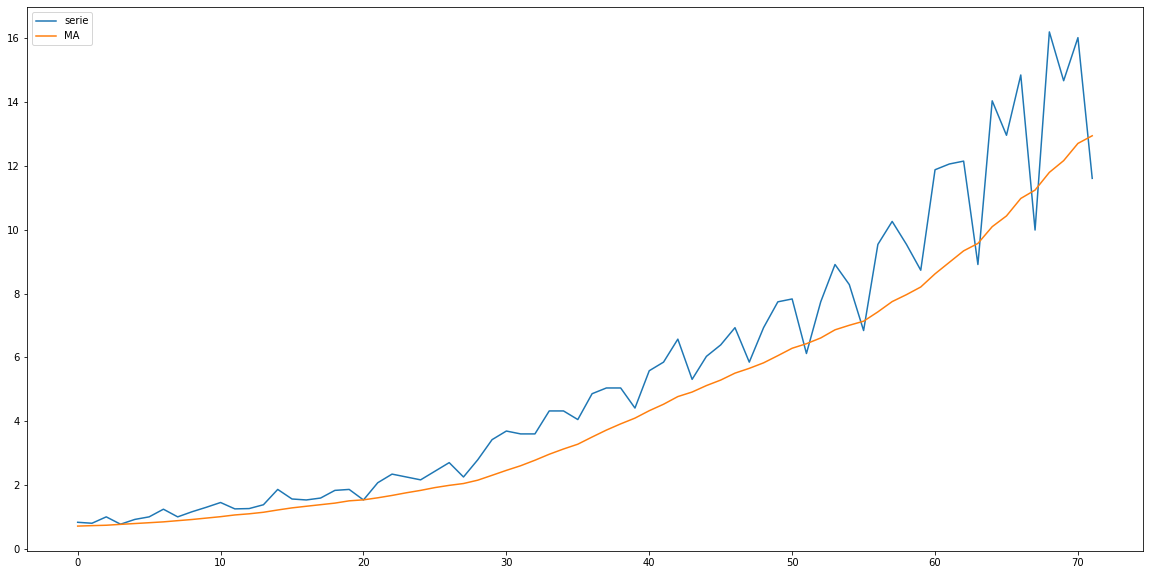

In [15]:
def show_trend(ts, ma_size):
  to_show = pd.DataFrame()

  to_show['serie'] = ts.values[ma_size:]
  to_show['MA']  = ts.rolling(ma_size).mean().values[ma_size:]
  to_show.plot()
  plt.show()

ts = df_jj['JohnsonJohnson']
ma_size=12
show_trend(ts, ma_size)

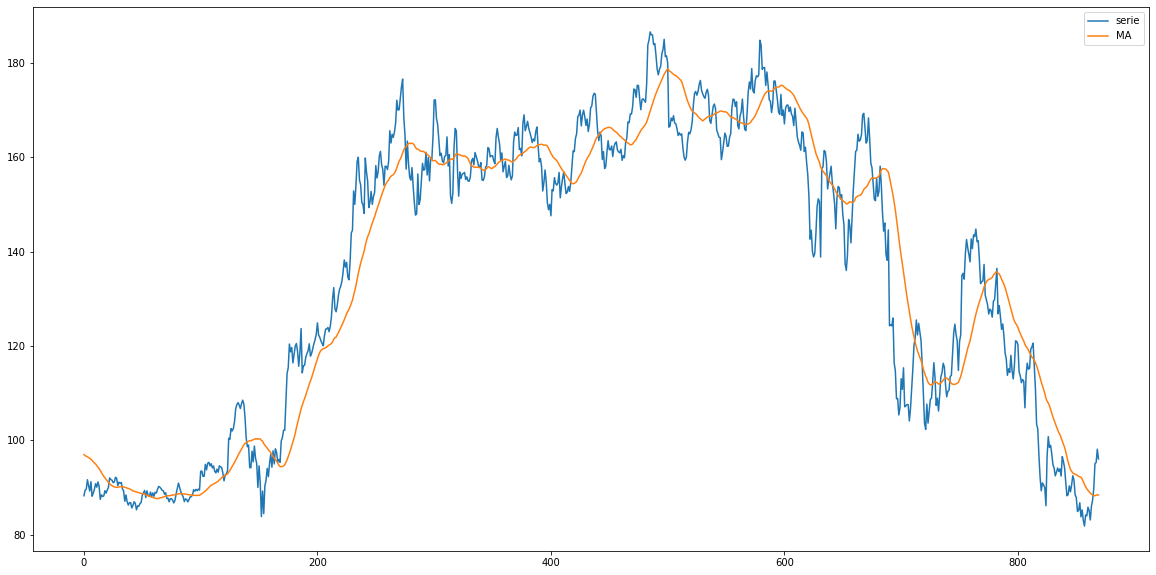

In [17]:
ts = df_amazon['Close'].iloc[-900:]
ma_size=30
show_trend(ts, ma_size)